In [1]:
import json
from qutip import *
import numpy as np
import scipy
import cmath
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import itertools
from numpy.random import seed
from numpy.random import rand
from itertools import product
from scipy.misc import derivative
from scipy import optimize
from functools import wraps
from time import time
from scipy.optimize import minimize
from matplotlib import gridspec


In [2]:
engErr = []
stateErr = []
time = []
lengths = []


In [7]:
for i in range(3):
    for j in range(10):
        N = i + 2
        M = j + 1
        dataLocation = 'Data/05-21-20/N'+ str(N) +'M' +str(M) +'.json'
        saved = []
        with open(dataLocation) as file:
            for line in file:
                saved.append(json.loads(line))

        cgdTime,cgdEngErr,cgdStateErr,edTime,length = saved
        engErr.append(cgdEngErr)
        stateErr.append(cgdStateErr)
        time.append(cgdTime)
        lengths.append(length)
        

In [8]:
    for j in range(6):
        N = 5
        M = j + 1
        dataLocation = 'Data/05-21-20/N'+ str(N) +'M' +str(M) +'.json'
        saved = []
        with open(dataLocation) as file:
            for line in file:
                saved.append(json.loads(line))

        cgdTime,cgdEngErr,cgdStateErr,edTime,length = saved
        engErr.append(cgdEngErr)
        stateErr.append(cgdStateErr)
        time.append(cgdTime)
        lengths.append(length)
        


Text(0, 0.5, 'Runtime')

<Figure size 432x288 with 0 Axes>

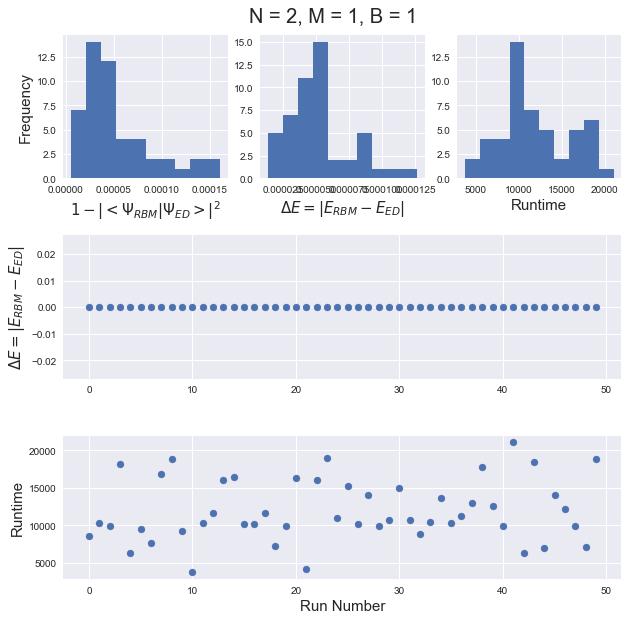

In [9]:
index = 35

hisIt= np.arange(lengths[index])
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("N = 2, M = 1, B = 1",size =20)
gs = gridspec.GridSpec(ncols=3, nrows=3, hspace = 0.4)
ttl.set_position([.5, 0.92])



ax1 = plt.subplot(gs[0, 0])
ax1 .hist(stateErr[index], bins=10) 
ax1 .set_xlabel("$1-|<\Psi_{RBM}|\Psi_{ED}>|^2$",size = 15)
ax1.set_ylabel("Frequency",size = 15)



ax2 = plt.subplot(gs[0, 1])
ax2.hist(engErr[index], bins=10) 
ax2.set_xlabel("$\Delta E = |E_{RBM}-E_{ED}|$",size = 15)



ax3 = plt.subplot(gs[0, 2])
ax3.hist(time[index], bins=10) 
ax3.set_xlabel("Runtime",size = 15)


ax4 = plt.subplot(gs[1, :])
ax4.scatter(hisIt,engErr[index]) 
#ax4.set_ylim([-0.000005,0.000005])
ax4 .set_ylabel("$\Delta E = |E_{RBM}-E_{ED}|$", size = 15)


ax5 = plt.subplot(gs[2, :])
ax5.scatter(hisIt,time[index])  
ax5.set_xlabel("Run Number",size = 15)
ax5 .set_ylabel("Runtime", size = 15)












In [10]:
avEngErr = np.sum(engErr[index])/(lengths[index])
avStateErr = np.sum(stateErr[index])/(lengths[index])
avRunTime = np.sum(time[index])/(lengths[index])
print('Average Energy Error: ', avEngErr )
print('Average Ground State Error: ', avStateErr )
print('Average Run Time: ', avRunTime )

cutOff = 0.0005
runsCutOff = sum(i>cutOff for i in engErr[index])
prob = (runsCutOff/50)
print("Number of runs abover 0.0001 error:", runsCutOff )
print("Prob of sucess:",  f"{1-prob:.4f}" )





Average Energy Error:  5.164613527048889e-05
Average Ground State Error:  5.329571143176004e-05
Average Run Time:  11951.597056722641
Number of runs abover 0.0001 error: 0
Prob of sucess: 1.0000


In [11]:
avEngErr = []
avStateErr = []
avRunTime = []
probSuccess = []
for i in range(len(engErr)):
    avEngErrTemp = np.sum(engErr[i])/(lengths[i])
    avEngErr.append(avEngErrTemp)
    avStateErrTemp = np.sum(stateErr[i])/(lengths[i])
    avStateErr.append(avStateErrTemp)
    avRunTimeTemp = np.sum(time[i])/(lengths[i])
    avRunTime.append(avRunTimeTemp)
    
    cutOff = 0.0005
    runsCutOff = sum(i>cutOff for i in engErr[i])
    prob = (runsCutOff/lengths[i])
    probSuccess.append(1-prob)





<Figure size 432x288 with 0 Axes>

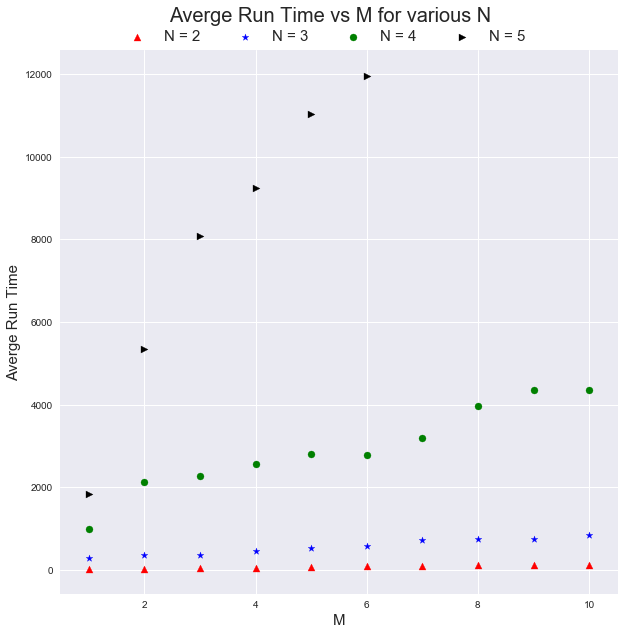

In [13]:
x = np.arange(1,11)
x4 = np.arange(1,7)
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Run Time vs M for various N",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.94])


ax4 = plt.subplot(gs[0, :])
#ax4.set_yscale('log')
#ax4.set_ylim([-0.001,0.01])
ax4.scatter(x,avRunTime[0:10], color='r',label='N = 2', marker= '^') 
ax4.scatter(x,avRunTime[10:20],color='b',label='N = 3', marker = '*') 
ax4.scatter(x,avRunTime[20:30], color='g',label='N = 4') 
ax4.scatter(x4,avRunTime[30:36], color='black',label='N = 5', marker = '>')
ax4 .set_ylabel("Averge Run Time", size = 15)
ax4.set_xlabel("M",size = 15)
plt.legend(loc = (0.1, 1),fontsize = 15,ncol=4)

In [18]:
ns = np.arange(2,6)
nsM1 = np.arange(2,7)
avRunTimeM1 = []
avRunTimeM2 = []
avRunTimeM3 = []
avRunTimeM4 = []
avRunTimeM5 = []
avRunTimeM6 = []
for i in range(4):
    avRunTimeM1.append(avRunTime[i*10])
    avRunTimeM2.append(avRunTime[i*10+1])
    avRunTimeM3.append(avRunTime[i*10+2])
    avRunTimeM4.append(avRunTime[i*10+3])
    avRunTimeM5.append(avRunTime[i*10+4])
    avRunTimeM6.append(avRunTime[i*10+5])
    

#avRunTimeM1.append(avRunTime[35])

In [21]:
print(avRunTime[30:36])
print(avRunTime[36])
print(ns)

[1841.8068571138383, 5356.8449847126, 8094.816228775978, 9240.058480730057, 11032.924197998047, 11951.597056722641]
3617.2274484920504
[2 3 4 5]


<Figure size 432x288 with 0 Axes>

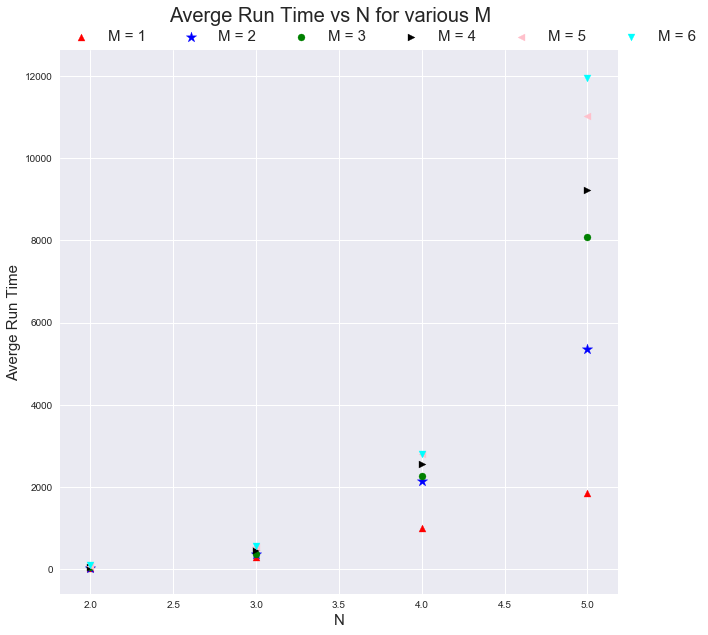

In [22]:
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Run Time vs N for various M",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.94])


ax4 = plt.subplot(gs[0, :])
#ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylim([-0.001,0.01])
#ax4.set_xlim([1,10])
ax4.scatter(ns,avRunTimeM1, color='r',label='M = 1', marker= '^') 
ax4.scatter(ns,avRunTimeM2,color='b',label='M = 2', marker = '*', s=120) 
ax4.scatter(ns,avRunTimeM3, color='g',label='M = 3') 
ax4.scatter(ns,avRunTimeM4, color='black',label='M = 4', marker = '>')
ax4.scatter(ns,avRunTimeM5, color='pink',label='M = 5', marker = '<')
ax4.scatter(ns,avRunTimeM6, color='cyan',label='M = 6', marker = 'v')
ax4 .set_ylabel("Averge Run Time", size = 15)
ax4.set_xlabel("N",size = 15)
plt.legend(loc = (0, 1),fontsize = 15,ncol=6)